In [3]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [7]:
data = open('poetry1.txt', 'r', encoding='utf-8').read()

Come all ye maidens young and fair
And you that are blooming in your prime
Always beware and keep your garden fair
Let no man steal away your thyme
For thyme it is a precious thing
And thyme brings all things to my mind
nlyme with all its flavours, along with all its joys
Thyme, brings all things to my mind
Once I and a bunch of thyme
i thought it never would decay
Then came a lusty sailor
Who chanced to pass my way
And stole my bunch of thyme away
The sailor gave to me a rose
A rose that never would decay
He gave it to me to keep me reminded
Of when he stole my thyme away
Sleep, my child, and peace attend thee
All through the night
Guardian angels God will send thee
Soft the drowsy hours are creeping
Hill and dale in slumber sleeping
I my loving vigil keeping
While the moon her watch is keeping
While the weary world is sleeping
Oer thy spirit gently stealing
Visions of delight revealing
Breathes a pure and holy feeling
Though I roam a minstrel lonely
My true harp shall praise sing onl

In [8]:
tokenizer = Tokenizer()

In [9]:
sentences = data.split('\n')

In [10]:
print(len(sentences))

1692


In [11]:
tokenizer.fit_on_texts(sentences)

In [13]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [15]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

2690


In [43]:
tmp_seq = tokenizer.texts_to_sequences(sentences[0:2])

In [44]:
print(tmp_seq)

[[51, 12, 96, 1217, 48, 2, 69], [2, 11, 15, 31, 361, 8, 24, 1218]]


In [53]:
def create_input_sentences(sentences):
    input_sentences = []
    for line in sentences:
        tokenized = tokenizer.texts_to_sequences([line])[0]
        for token_index in range(len(tokenized)):
            res = tokenized[0:token_index+1]
            print(res)
            input_sentences.append(res)
    return input_sentences

In [55]:
input_sentences = create_input_sentences(sentences)

[51]
[51, 12]
[51, 12, 96]
[51, 12, 96, 1217]
[51, 12, 96, 1217, 48]
[51, 12, 96, 1217, 48, 2]
[51, 12, 96, 1217, 48, 2, 69]
[2]
[2, 11]
[2, 11, 15]
[2, 11, 15, 31]
[2, 11, 15, 31, 361]
[2, 11, 15, 31, 361, 8]
[2, 11, 15, 31, 361, 8, 24]
[2, 11, 15, 31, 361, 8, 24, 1218]
[272]
[272, 798]
[272, 798, 2]
[272, 798, 2, 204]
[272, 798, 2, 204, 24]
[272, 798, 2, 204, 24, 579]
[272, 798, 2, 204, 24, 579, 69]
[118]
[118, 35]
[118, 35, 119]
[118, 35, 119, 799]
[118, 35, 119, 799, 56]
[118, 35, 119, 799, 56, 24]
[118, 35, 119, 799, 56, 24, 184]
[10]
[10, 184]
[10, 184, 25]
[10, 184, 25, 23]
[10, 184, 25, 23, 5]
[10, 184, 25, 23, 5, 580]
[10, 184, 25, 23, 5, 580, 456]
[2]
[2, 184]
[2, 184, 800]
[2, 184, 800, 12]
[2, 184, 800, 12, 801]
[2, 184, 800, 12, 801, 4]
[2, 184, 800, 12, 801, 4, 7]
[2, 184, 800, 12, 801, 4, 7, 235]
[1219]
[1219, 17]
[1219, 17, 12]
[1219, 17, 12, 75]
[1219, 17, 12, 75, 1220]
[1219, 17, 12, 75, 1220, 236]
[1219, 17, 12, 75, 1220, 236, 17]
[1219, 17, 12, 75, 1220, 236, 17, 12

[4, 1380, 9, 84, 4, 7, 22, 2]
[4, 1380, 9, 84, 4, 7, 22, 2, 175]
[7]
[7, 1381]
[7, 1381, 171]
[7, 1381, 171, 504]
[7, 1381, 171, 504, 111]
[7, 1381, 171, 504, 111, 651]
[7, 1381, 171, 504, 111, 651, 1382]
[6]
[6, 405]
[6, 405, 254]
[6, 405, 254, 3]
[6, 405, 254, 3, 255]
[6, 405, 254, 3, 255, 32]
[6, 405, 254, 3, 255, 32, 101]
[6, 405, 254, 3, 255, 32, 101, 377]
[7]
[7, 1383]
[7, 1383, 208]
[7, 1383, 208, 2]
[7, 1383, 208, 2, 7]
[7, 1383, 208, 2, 7, 132]
[7, 1383, 208, 2, 7, 132, 392]
[72]
[72, 12]
[72, 12, 197]
[72, 12, 197, 16]
[72, 12, 197, 16, 45]
[72, 12, 197, 16, 45, 64]
[72, 12, 197, 16, 45, 64, 1384]
[72, 12, 197, 16, 45, 64, 1384, 289]
[19]
[19, 37]
[19, 37, 652]
[19, 37, 652, 7]
[19, 37, 652, 7, 171]
[19, 37, 652, 7, 171, 8]
[19, 37, 652, 7, 171, 8, 861]
[19, 37, 652, 7, 171, 8, 861, 1385]
[364]
[364, 23]
[364, 23, 1]
[364, 23, 1, 259]
[364, 23, 1, 259, 7]
[364, 23, 1, 259, 7, 613]
[364, 23, 1, 259, 7, 613, 23]
[364, 23, 1, 259, 7, 613, 23, 206]
[505]
[505, 4]
[505, 4, 30]
[50

[163, 53]
[163, 53, 3]
[163, 53, 3, 72]
[163, 53, 3, 72, 55]
[163, 53, 3, 72, 55, 1]
[163, 53, 3, 72, 55, 1, 159]
[163, 53, 3, 72, 55, 1, 159, 34]
[163, 53, 3, 72, 55, 1, 159, 34, 300]
[163]
[163, 53]
[163, 53, 3]
[163, 53, 3, 72]
[163, 53, 3, 72, 70]
[163, 53, 3, 72, 70, 346]
[163, 53, 3, 72, 70, 346, 34]
[163, 53, 3, 72, 70, 346, 34, 300]
[163, 53, 3, 72, 70, 346, 34, 300, 53]
[163, 53, 3, 72, 70, 346, 34, 300, 53, 125]
[3]
[3, 82]
[3, 82, 536]
[3, 82, 536, 60]
[3, 82, 536, 60, 230]
[3, 82, 536, 60, 230, 209]
[3, 82, 536, 60, 230, 209, 39]
[3, 82, 536, 60, 230, 209, 39, 13]
[3, 82, 536, 60, 230, 209, 39, 13, 5]
[3, 82, 536, 60, 230, 209, 39, 13, 5, 537]
[19]
[19, 991]
[19, 991, 108]
[19, 991, 108, 2]
[19, 991, 108, 2, 538]
[19, 991, 108, 2, 538, 4]
[19, 991, 108, 2, 538, 4, 62]
[19, 991, 108, 2, 538, 4, 62, 59]
[19, 991, 108, 2, 538, 4, 62, 59, 27]
[19, 991, 108, 2, 538, 4, 62, 59, 27, 9]
[3]
[3, 82]
[3, 82, 159]
[3, 82, 159, 992]
[3, 82, 159, 992, 301]
[3, 82, 159, 992, 301, 106]
[3

[12]
[12, 10]
[12, 10, 1885]
[12, 10, 1885, 351]
[84]
[84, 1886]
[84, 1886, 86]
[84, 1886, 86, 2]
[84, 1886, 86, 2, 44]
[1887]
[1887, 60]
[1887, 60, 2]
[1887, 60, 2, 1888]
[1887, 60, 2, 1888, 444]
[597]
[597, 1]
[597, 1, 1889]
[597, 1, 1889, 88]
[597, 1, 1889, 88, 1]
[597, 1, 1889, 88, 1, 71]
[12]
[12, 10]
[12, 10, 1890]
[12, 10, 1890, 6]
[12, 10, 1890, 6, 739]
[202]
[202, 18]
[202, 18, 431]
[202, 18, 431, 20]
[202, 18, 431, 20, 1891]
[202, 18, 431, 20, 1891, 31]
[137]
[137, 18]
[137, 18, 107]
[137, 18, 107, 20]
[137, 18, 107, 20, 389]
[137, 18, 107, 20, 389, 297]
[740]
[740, 67]
[740, 67, 59]
[740, 67, 59, 12]
[740, 67, 59, 12, 28]
[740, 67, 59, 12, 28, 144]
[23]
[23, 63]
[23, 63, 741]
[23, 63, 741, 739]
[281]
[281, 1892]
[281, 1892, 281]
[281, 1892, 281, 1893]
[281]
[281, 1894]
[281, 1894, 4]
[281, 1894, 4, 498]
[281, 1894, 4, 498, 18]
[281, 1894, 4, 498, 18, 1895]
[281]
[281, 1053]
[281, 1053, 1896]
[281, 1053, 1896, 20]
[281, 1053, 1896, 20, 1897]
[170]
[170, 1]
[170, 1, 1898]
[170

[2, 2131, 2132, 8, 1, 2133, 6]
[2, 2131, 2132, 8, 1, 2133, 6, 127]
[2, 2131, 2132, 8, 1, 2133, 6, 127, 277]
[2, 2131, 2132, 8, 1, 2133, 6, 127, 277, 6]
[2, 2131, 2132, 8, 1, 2133, 6, 127, 277, 6, 1]
[2, 2131, 2132, 8, 1, 2133, 6, 127, 277, 6, 1, 71]
[1]
[1, 2134]
[1, 2134, 31]
[1, 2134, 31, 1122]
[1, 2134, 31, 1122, 2135]
[1, 2134, 31, 1122, 2135, 116]
[1, 2134, 31, 1122, 2135, 116, 23]
[1, 2134, 31, 1122, 2135, 116, 23, 124]
[1, 2134, 31, 1122, 2135, 116, 23, 124, 2]
[1, 2134, 31, 1122, 2135, 116, 23, 124, 2, 1]
[1, 2134, 31, 1122, 2135, 116, 23, 124, 2, 1, 2136]
[1, 2134, 31, 1122, 2135, 116, 23, 124, 2, 1, 2136, 2137]
[1, 2134, 31, 1122, 2135, 116, 23, 124, 2, 1, 2136, 2137, 44]
[19]
[19, 2138]
[19, 2138, 16]
[19, 2138, 16, 1123]
[19, 2138, 16, 1123, 905]
[19, 2138, 16, 1123, 905, 21]
[19, 2138, 16, 1123, 905, 21, 1]
[19, 2138, 16, 1123, 905, 21, 1, 520]
[19, 2138, 16, 1123, 905, 21, 1, 520, 23]
[19, 2138, 16, 1123, 905, 21, 1, 520, 23, 221]
[19, 2138, 16, 1123, 905, 21, 1, 520, 23,

[1155, 86, 1, 2326, 2, 1]
[1155, 86, 1, 2326, 2, 1, 34]
[1155, 86, 1, 2326, 2, 1, 34, 2327]
[1155, 86, 1, 2326, 2, 1, 34, 2327, 2328]
[1]
[1, 2329]
[1, 2329, 1]
[1, 2329, 1, 446]
[1, 2329, 1, 446, 1]
[1, 2329, 1, 446, 1, 258]
[1, 2329, 1, 446, 1, 258, 2]
[1, 2329, 1, 446, 1, 258, 2, 1]
[1, 2329, 1, 446, 1, 258, 2, 1, 2330]
[421]
[421, 64]
[421, 64, 1]
[421, 64, 1, 384]
[421, 64, 1, 384, 27]
[421, 64, 1, 384, 27, 1]
[421, 64, 1, 384, 27, 1, 572]
[421, 64, 1, 384, 27, 1, 572, 119]
[204]
[204, 1]
[204, 1, 1135]
[204, 1, 1135, 27]
[204, 1, 1135, 27, 780]
[204, 1, 1135, 27, 780, 2331]
[204]
[204, 24]
[204, 24, 107]
[204, 24, 107, 91]
[204, 24, 107, 91, 2332]
[204, 24, 107, 91, 2332, 180]
[1]
[1, 572]
[1, 572, 307]
[1, 572, 307, 31]
[1, 572, 307, 31, 16]
[1, 572, 307, 31, 16, 57]
[1, 572, 307, 31, 16, 57, 164]
[2333]
[2333, 10]
[2333, 10, 1]
[2333, 10, 1, 138]
[2333, 10, 1, 138, 1156]
[8]
[8, 1]
[8, 1, 331]
[8, 1, 331, 6]
[8, 1, 331, 6, 2334]
[1157]
[1157, 4]
[1157, 4, 1]
[1157, 4, 1, 98]
[1

[1, 586, 194, 4, 1, 683]
[1, 586, 194, 4, 1, 683, 23]
[1, 586, 194, 4, 1, 683, 23, 124]
[8]
[8, 1]
[8, 1, 2459]
[8, 1, 2459, 6]
[8, 1, 2459, 6, 491]
[8, 1, 2459, 6, 491, 11]
[8, 1, 2459, 6, 491, 11, 26]
[8, 1, 2459, 6, 491, 11, 26, 147]
[8, 1, 2459, 6, 491, 11, 26, 147, 115]
[40]
[40, 315]
[40, 315, 770]
[40, 315, 770, 33]
[40, 315, 770, 33, 1098]
[40, 315, 770, 33, 1098, 2460]
[40, 315, 770, 33, 1098, 2460, 16]
[2]
[2, 40]
[2, 40, 105]
[2, 40, 105, 366]
[2, 40, 105, 366, 2461]
[2, 40, 105, 366, 2461, 211]
[2, 40, 105, 366, 2461, 211, 115]
[93]
[93, 6]
[93, 6, 212]
[93, 6, 212, 55]
[93, 6, 212, 55, 1]
[93, 6, 212, 55, 1, 2462]
[93, 6, 212, 55, 1, 2462, 2463]
[677]
[677, 12]
[677, 12, 1]
[677, 12, 1, 153]
[677, 12, 1, 153, 2464]
[677, 12, 1, 153, 2464, 142]
[39]
[39, 770]
[39, 770, 38]
[39, 770, 38, 1183]
[39, 770, 38, 1183, 185]
[39, 770, 38, 1183, 185, 2465]
[39, 770, 38, 1183, 185, 2465, 120]
[39, 770, 38, 1183, 185, 2465, 120, 1139]
[39]
[39, 2466]
[39, 2466, 366]
[39, 2466, 366, 12

[2, 109, 1210]
[2, 109, 1210, 23]
[2, 109, 1210, 23, 996]
[2653]
[2653, 12]
[2653, 12, 6]
[2653, 12, 6, 2654]
[2653, 12, 6, 2654, 459]
[118]
[118, 245]
[118, 245, 203]
[118, 245, 203, 209]
[118, 245, 203, 209, 2655]
[118, 245, 203, 209, 2655, 46]
[118, 245, 203, 209, 2655, 46, 122]
[20]
[20, 3]
[20, 3, 13]
[20, 3, 13, 5]
[20, 3, 13, 5, 544]
[20, 3, 13, 5, 544, 84]
[20, 3, 13, 5, 544, 84, 1211]
[20, 3, 13, 5, 544, 84, 1211, 138]
[3]
[3, 2656]
[3, 2656, 440]
[3, 2656, 440, 578]
[3, 2656, 440, 578, 2]
[3, 2656, 440, 578, 2, 40]
[3, 2656, 440, 578, 2, 40, 268]
[3, 2656, 440, 578, 2, 40, 268, 33]
[3, 2656, 440, 578, 2, 40, 268, 33, 13]
[3, 2656, 440, 578, 2, 40, 268, 33, 13, 1022]
[117]
[117, 3]
[117, 3, 720]
[117, 3, 720, 7]
[117, 3, 720, 7, 545]
[117, 3, 720, 7, 545, 2]
[117, 3, 720, 7, 545, 2, 52]
[117, 3, 720, 7, 545, 2, 52, 3]
[117, 3, 720, 7, 545, 2, 52, 3, 720]
[117, 3, 720, 7, 545, 2, 52, 3, 720, 7]
[117, 3, 720, 7, 545, 2, 52, 3, 720, 7, 1212]
[516]
[516, 287]
[516, 287, 2]
[516, 2

In [56]:
sentences_length = [len(sentence) for sentence in input_sentences]
print(sentences_length)

[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3,

In [58]:
max_length_for_pad = np.max(sentences_length)
print(max_length_for_pad)

16


In [62]:
padded_sequences = pad_sequences(input_sentences, maxlen=max_length_for_pad, padding='pre')
print(padded_sequences)

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]
 [  0   0   0 ... 105 138 184]]


In [81]:
xs, labels = padded_sequences[:,0:-1],padded_sequences[:,-1]

In [82]:
labels

array([ 51,  12,  96, ..., 105, 138, 184])

In [83]:
xs

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,  51],
       [  0,   0,   0, ...,   0,  51,  12],
       ...,
       [  0,   0,   0, ...,   0,   0,  47],
       [  0,   0,   0, ...,   0,  47, 105],
       [  0,   0,   0, ...,  47, 105, 138]])

In [84]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) #one hot encoding here

In [85]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [86]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [87]:
print(xs[6])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]


In [88]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
   48]
[0. 0. 1. ... 0. 0. 0.]


In [89]:
print(len(ys[0]))

2690


In [91]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_length_for_pad-1)) #-1 cause we reduced with creating labels
model.add(Bidirectional(LSTM(150))) #we are using cell state here..
model.add(Dense(total_words, activation='softmax')) #one hot encoding result
adam = Adam(lr=0.01)

In [92]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [94]:
model.summary()

#embedding output discribing 100 dimensional vector for every word from sentence



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           269000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               301200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________


In [95]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
430/430 [==============================] - 16s 29ms/step - loss: 6.7200 - accuracy: 0.06301s - loss: 6 - ETA
Epoch 2/100
430/430 [==============================] - 12s 28ms/step - loss: 5.5931 - accuracy: 0.1141
Epoch 3/100
430/430 [==============================] - 13s 30ms/step - loss: 4.6891 - accuracy: 0.1700
Epoch 4/100
430/430 [==============================] - 13s 29ms/step - loss: 3.8662 - accuracy: 0.2521
Epoch 5/100
430/430 [==============================] - 12s 28ms/step - loss: 3.1008 - accuracy: 0.3540
Epoch 6/100
430/430 [==============================] - 13s 31ms/step - loss: 2.6036 - accuracy: 0.4321
Epoch 7/100
430/430 [==============================] - 12s 28ms/step - loss: 2.2046 - accuracy: 0.5103
Epoch 8/100
430/430 [==============================] - 12s 28ms/step - loss: 1.9272 - accuracy: 0.5707
Epoch 9/100
430/430 [==============================] - 12s 29ms/step - loss: 1.8255 - accuracy: 0.5955
Epoch 10/100
430/430 [==============================] -

430/430 [==============================] - 12s 28ms/step - loss: 1.3535 - accuracy: 0.6932
Epoch 76/100
430/430 [==============================] - 12s 28ms/step - loss: 1.3581 - accuracy: 0.6918
Epoch 77/100
430/430 [==============================] - 13s 30ms/step - loss: 1.3234 - accuracy: 0.7045
Epoch 78/100
430/430 [==============================] - 12s 28ms/step - loss: 1.3535 - accuracy: 0.6947
Epoch 79/100
430/430 [==============================] - 12s 28ms/step - loss: 1.3428 - accuracy: 0.7041
Epoch 80/100
430/430 [==============================] - 12s 28ms/step - loss: 1.3615 - accuracy: 0.6933
Epoch 81/100
430/430 [==============================] - 12s 27ms/step - loss: 1.3504 - accuracy: 0.7029
Epoch 82/100
430/430 [==============================] - 12s 28ms/step - loss: 1.3955 - accuracy: 0.6919
Epoch 83/100
430/430 [==============================] - 12s 27ms/step - loss: 1.3938 - accuracy: 0.6871
Epoch 84/100
430/430 [==============================] - 12s 28ms/step - loss:

In [96]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

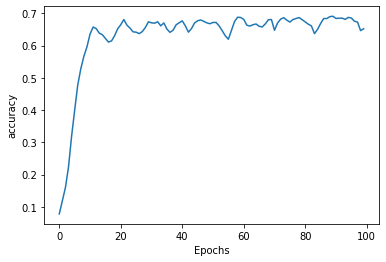

In [97]:
plot_graphs(history, 'accuracy')

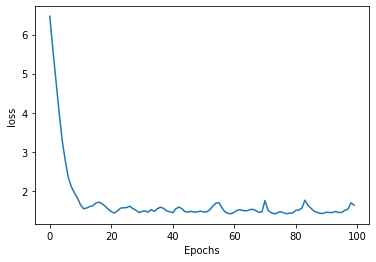

In [99]:
plot_graphs(history, 'loss')

In [122]:
seed_text = "I've got a bad feeling about this"
next_words = 1
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_length_for_pad-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    index_max_prob = np.argmax(predicted)
    print(index_max_prob)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    print(output_word)
    seed_text += " " + output_word

TypeError: object of type 'numpy.int64' has no len()

In [116]:
seed_text

"I've got a bad feeling about this"